In [21]:
import json
import os
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.express as px
from collections import OrderedDict
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
from IPython.display import Image

In [22]:
in_folder_path = '../../data/processed/mc/scenarios'

In [23]:
modal_splits = {}

for f_name in tqdm(sorted(os.listdir(in_folder_path))):
    if f_name.startswith('ms'):
        # print(f_name)
        modal_name = f_name.replace('.json', '')

        with open(in_folder_path+'/'+f_name, 'r') as f:
            ms = json.load(f)

        drivers_mean = ms['car_driver']['median']
        passengers_mean = ms['car_passenger']['median']
        drivers_std = ms['car_driver']['std']
        passengers_std = ms['car_passenger']['std']
        
        ms['car'] = {}
        s = drivers_mean + passengers_mean
        ms['car']['median'] = s
        ms['car']['std'] = (((drivers_mean / s) * drivers_std) + ((passengers_mean / s) * passengers_std)) / 2
        ms['car']['list'] = [x[0] + x[1] for x in zip(ms['car_driver']['list'], ms['car_passenger']['list'])]

        del ms['car_driver']
        del ms['car_passenger']

        
        ms = OrderedDict((k, ms[k]) for k in [
            'car', 'public', 'pedestrian', 'bicycle'
        ])

        modal_splits[modal_name] = ms


100%|██████████| 9/9 [00:00<00:00, 2889.08it/s]


## Grouped bar plots

### Household_cars

In [24]:
# modes=list(list(modal_splits.values())[0].keys())

# mean_0_0_0 = modal_splits['ms_scenario_0_0_0'].values()
# mean_0_0_0 = list(map(lambda x: x['median'], mean_0_0_0))

# mean_0_0_15 = modal_splits['ms_scenario_0_0_15'].values()
# mean_0_0_15 = list(map(lambda x: x['median'], mean_0_0_15))

# mean_0_0_3 = modal_splits['ms_scenario_0_0_3'].values()
# mean_0_0_3 = list(map(lambda x: x['median'], mean_0_0_3))

# fig = go.Figure(data=[
#     go.Bar(name='0', x=modes, y=mean_0_0_0),
#     go.Bar(name='15', x=modes, y=mean_0_0_15),
#     go.Bar(name='3', x=modes, y=mean_0_0_3)
# ])
# # Change the bar mode
# fig.update_layout(barmode='group')
# fig.show()

array([39.33647282, 39.30399593, 39.35667313, 39.38313249, 39.30022521,
       39.34613399, 39.1878987 , 39.3720382 , 39.26016542, 39.34088001,
       39.32001129, 39.26334183, 39.28321253, 39.29439602, 39.31043389,
       39.2034812 , 39.32720792, 39.29519167, 39.30748425, 39.33281696,
       39.23541034, 39.3804003 , 39.44691605, 39.38286526, 39.33908729,
       39.24144717, 39.45791515, 39.22946982, 39.25581573, 39.39756113,
       39.26111691, 39.15216194, 39.27531807, 39.36495966, 39.1732548 ,
       39.26412284, 39.39059046, 39.31569281, 39.27621222, 39.3391617 ,
       39.27037172, 39.2605455 , 39.30565165, 39.38187652, 39.37695708,
       39.36027054, 39.41360861, 39.34714292, 39.22200835, 39.25585466,
       39.42198577, 39.3665144 , 39.24556149, 39.2623248 , 39.39662577,
       39.2922371 , 39.25119624, 39.30196594, 39.33818198, 39.42608417,
       39.41597333, 39.34939251, 39.34968965, 39.26510874, 39.09741805,
       39.37917456, 39.3673066 , 39.2442153 , 39.31743176, 39.38

In [25]:
stats.bayes_mvs(np.array(modal_splits['ms_scenario_0_0_0']['car']['list']))

(Mean(statistic=39.318464465961505, minmax=(39.30669022300055, 39.33023870892246)),
 Variance(statistic=0.005132259695634935, minmax=(0.004039994285301461, 0.006461426240990831)),
 Std_dev(statistic=0.07145539364346672, minmax=(0.0635609493738212, 0.08038299721328404)))

In [26]:
scenarios = ['30%', '15%', '0%']

mean_0_0_0 = modal_splits['ms_scenario_0_0_0'].values()
mean_0_0_0 = list(map(lambda x: x['median'], mean_0_0_0))

mean_0_0_15 = modal_splits['ms_scenario_0_0_15'].values()
mean_0_0_15 = list(map(lambda x: x['median'], mean_0_0_15))

mean_0_0_3 = modal_splits['ms_scenario_0_0_3'].values()
mean_0_0_3 = list(map(lambda x: x['median'], mean_0_0_3))

fig = go.Figure()

round_v = 1
margin_size = 100

# car
y = scenarios
x = [mean_0_0_3[0], mean_0_0_15[0], mean_0_0_0[0]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Samochód',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle',
    marker_color='#fabd15'
))

# publlic
y = scenarios
x = [mean_0_0_3[1], mean_0_0_15[1], mean_0_0_0[1]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Komunikacja publiczna',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v))+"%", x)),
    textposition='auto',
    insidetextanchor='middle',
    marker_color='#cc4125'
))

# pedestrian
y = scenarios
x = [mean_0_0_3[2], mean_0_0_15[2], mean_0_0_0[2]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Pieszo',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle',
    marker_color='#9cc1ff'
))

# bicycle
y = scenarios
x = [mean_0_0_3[3], mean_0_0_15[3], mean_0_0_0[3]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Rower',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle',
    marker_color='#b6d7a8'
))

# Change the bar mode
fig.update_layout(
    barmode='stack',
    legend={
        'traceorder':'normal',
        'orientation': 'h',
        'yanchor': 'top',
        'y': 1.15,
        'xanchor': 'left',
        'x': 0.01
    },
    # title='Rozkład podróży na środki transportu dla scenariusza ...',
    xaxis_title='Mediana udziału środka transportu we wszystkich podróżach',
    yaxis_title='Odsetek mieszkańców rezygnujących <br> z jednego samochodu',
    margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size),
    font=dict(
        family="Comfortaa",
        size=45,
    ),
    width=1600,
    height=1000
)

# whisker_y_0 = 2

# fig.add_shape(type="line",
#     x0=39.3, y0=whisker_y_0, x1=39.33, y1=whisker_y_0,
#     line=dict(
#         color="MediumPurple",
#         width=4,
#     )
# )
fig.show()
# img_bytes = fig.to_image(format="png")

# with open('./test.png', 'wb') as f:
#     f.write(img_bytes)

In [17]:
out_dir = '../../data/processed/mc/scenarios_figs'
out_file = 'ms_0_0_x.png'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

out_path = os.path.join(out_dir, out_file)

out_path

'../../data/processed/mc/scenarios_figs/ms_0_0_x.svg'

In [18]:
fig.write_image(out_path)

In [19]:
img_bytes = fig.to_image(format="png")

In [27]:
from IPython.display import Image
img = Image(img_bytes)

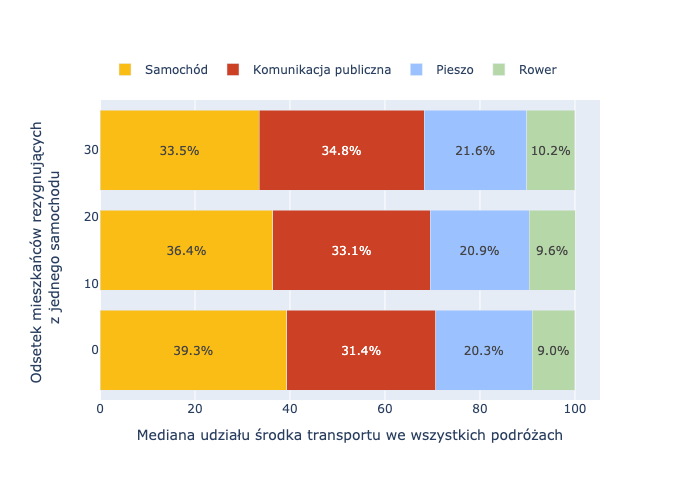

In [29]:
img

### Comfort + punctuality

In [58]:
scenarios = ['30%', '15%', '0%']

mean_0_0_0 = modal_splits['ms_scenario_0_0_0'].values()
mean_0_0_0 = list(map(lambda x: x['median'], mean_0_0_0))

mean_0_0_15 = modal_splits['ms_scenario_15_15_0'].values()
mean_0_0_15 = list(map(lambda x: x['median'], mean_0_0_15))

mean_0_0_3 = modal_splits['ms_scenario_3_3_0'].values()
mean_0_0_3 = list(map(lambda x: x['median'], mean_0_0_3))

fig = go.Figure()

round_v = 1
margin_size = 100

# car
y = scenarios
x = [mean_0_0_3[0], mean_0_0_15[0], mean_0_0_0[0]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Samochód',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle',
    marker_color='#fabd15'
))

# publlic
y = scenarios
x = [mean_0_0_3[1], mean_0_0_15[1], mean_0_0_0[1]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Komunikacja publiczna',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v))+"%", x)),
    textposition='auto',
    insidetextanchor='middle',
    marker_color='#cc4125'
))

# pedestrian
y = scenarios
x = [mean_0_0_3[2], mean_0_0_15[2], mean_0_0_0[2]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Pieszo',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle',
    marker_color='#9cc1ff'
))

# bicycle
y = scenarios
x = [mean_0_0_3[3], mean_0_0_15[3], mean_0_0_0[3]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Rower',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle',
    marker_color='#b6d7a8'
))

# Change the bar mode
fig.update_layout(
    barmode='stack',
    legend={
        'traceorder':'normal',
        'orientation': 'h',
        'yanchor': 'top',
        'y': 1.15,
        'xanchor': 'left',
        'x': 0.01
    },
    # title='Rozkład podróży na środki transportu dla scenariusza ...',
    xaxis_title='Mediana udziału środka transportu we wszystkich podróżach',
    yaxis_title='Odsetek mieszkańców odczuwających poprawę <br> komfortu oraz punktualności komunikacji miejskiej',
    margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size),
    font=dict(
        family="Comfortaa",
        # size=45,
    ),
    # width=1600,
    # height=1000
)

# whisker_y_0 = 2

# fig.add_shape(type="line",
#     x0=39.3, y0=whisker_y_0, x1=39.33, y1=whisker_y_0,
#     line=dict(
#         color="MediumPurple",
#         width=4,
#     )
# )
fig.show()
# img_bytes = fig.to_image(format="png")

# with open('./test.png', 'wb') as f:
#     f.write(img_bytes)

### Cars + comfort + punctuality

In [28]:
scenarios = ['30%', '15%', '0%']

mean_0_0_0 = modal_splits['ms_scenario_0_0_0'].values()
mean_0_0_0 = list(map(lambda x: x['median'], mean_0_0_0))

mean_0_0_15 = modal_splits['ms_scenario_15_15_15'].values()
mean_0_0_15 = list(map(lambda x: x['median'], mean_0_0_15))

mean_0_0_3 = modal_splits['ms_scenario_3_3_3'].values()
mean_0_0_3 = list(map(lambda x: x['median'], mean_0_0_3))

fig = go.Figure()

round_v = 1
margin_size = 100

# car
y = scenarios
x = [mean_0_0_3[0], mean_0_0_15[0], mean_0_0_0[0]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Samochód',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle'
))

# publlic
y = scenarios
x = [mean_0_0_3[1], mean_0_0_15[1], mean_0_0_0[1]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Komunikacja publiczna',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v))+"%", x)),
    textposition='auto',
    insidetextanchor='middle'
))

# pedestrian
y = scenarios
x = [mean_0_0_3[2], mean_0_0_15[2], mean_0_0_0[2]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Pieszo',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle'
))

# bicycle
y = scenarios
x = [mean_0_0_3[3], mean_0_0_15[3], mean_0_0_0[3]]
fig.add_trace(go.Bar(
    y=y,
    x=x,
    name='Rower',
    orientation='h',
    text=list(map(lambda v: str(round(v, round_v)) + "%", x)),
    textposition='auto',
    insidetextanchor='middle'
))

# Change the bar mode
fig.update_layout(
    barmode='stack',
    legend={
        'traceorder':'normal',
        'orientation': 'h',
        'yanchor': 'top',
        'y': 1.15,
        'xanchor': 'left',
        'x': 0.01
    },
    # title='Rozkład podróży na środki transportu dla scenariusza ...',
    xaxis_title='Mediana udziału środka transportu we wszystkich podróżach',
    yaxis_title='Odsetek mieszkańców odczuwających poprawę <br> komfortu i punktualności komunikacji miejskiej <br> oraz rezygnujących z jednego samochodu',
    margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size),
)
fig.show()

## Heatmaps

In [56]:
margin_size = 150

base = modal_splits['ms_scenario_0_0_0']['car']['median']

sc_0_0_15 = modal_splits['ms_scenario_0_0_15']['car']['median']
sc_0_0_30 = modal_splits['ms_scenario_0_0_3']['car']['median']

sc_15_15_0 = modal_splits['ms_scenario_15_15_0']['car']['median']
sc_15_15_15 = modal_splits['ms_scenario_15_15_15']['car']['median']
sc_15_15_30 = modal_splits['ms_scenario_15_15_3']['car']['median']

sc_30_30_0 = modal_splits['ms_scenario_3_3_0']['car']['median']
sc_30_30_15 = modal_splits['ms_scenario_3_3_15']['car']['median']
sc_30_30_30 = modal_splits['ms_scenario_3_3_3']['car']['median']

def get_diff(base, new):
    return round(((new - base) / base) * 100 , 1)

data=[
    [0, get_diff(base, sc_0_0_15), get_diff(base, sc_0_0_30)],
    [get_diff(base, sc_15_15_0), get_diff(base, sc_15_15_15), get_diff(base, sc_15_15_30)],
    [get_diff(base, sc_30_30_0), get_diff(base, sc_30_30_15), get_diff(base, sc_30_30_30)]
]

fig = ff.create_annotated_heatmap(data,
                x=['0%', '15%', '30%'],
                y=['0%', '15%', '30%'],
                colorscale=px.colors.sequential.GnBu[::-1],
               )
fig.update_xaxes(side="bottom")
fig['layout']['xaxis']['side'] = 'bottom'
fig.update_layout(
    title='Procentowy spadek udziału komunikacji samochodowej w mobilności',
    xaxis_title='Odsetek mieszkańców rezygnujących <br> z jednego samochodu',
    yaxis_title='Odsetek mieszkańców odczuwających <br> poprawę komfortu oraz punktualności <br> komunikacji miejskiej',
    margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size),
    height=1000,
    width=1000,
    font=dict(
        family="Comfortaa",
        size=45,
    ),
)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].text = fig.layout.annotations[i].text + '%'
    fig.layout.annotations[i].font.size = 45
fig.layout.annotations[0].text = '-'
fig.show()

In [57]:
mode = 'public'

base = modal_splits['ms_scenario_0_0_0'][mode]['median']

sc_0_0_15 = modal_splits['ms_scenario_0_0_15'][mode]['median']
sc_0_0_30 = modal_splits['ms_scenario_0_0_3'][mode]['median']

sc_15_15_0 = modal_splits['ms_scenario_15_15_0'][mode]['median']
sc_15_15_15 = modal_splits['ms_scenario_15_15_15'][mode]['median']
sc_15_15_30 = modal_splits['ms_scenario_15_15_3'][mode]['median']

sc_30_30_0 = modal_splits['ms_scenario_3_3_0'][mode]['median']
sc_30_30_15 = modal_splits['ms_scenario_3_3_15'][mode]['median']
sc_30_30_30 = modal_splits['ms_scenario_3_3_3'][mode]['median']

def get_diff(base, new):
    return round(((new - base) / base) * 100 , 1)

# data=[
#     [get_diff(base, sc_30_30_0), get_diff(base, sc_30_30_0) + get_diff(base, sc_0_0_15), get_diff(base, sc_30_30_30)],
#     [get_diff(base, sc_15_15_0), get_diff(base, sc_15_15_15), get_diff(base, sc_15_15_0) + get_diff(base, sc_0_0_30)],
#     [0, get_diff(base, sc_0_0_15), get_diff(base, sc_0_0_30)]
# ]

data=[
    [0, get_diff(base, sc_0_0_15), get_diff(base, sc_0_0_30)],
    [get_diff(base, sc_15_15_0), get_diff(base, sc_15_15_15), get_diff(base, sc_15_15_30)],
    [get_diff(base, sc_30_30_0), get_diff(base, sc_30_30_15), get_diff(base, sc_30_30_30)],
]

# fig = px.imshow(data,
#                 labels=dict(
#                     x='Odsetek mieszkańców rezygnujących <br> z jednego samochodu',
#                     y='Odsetek mieszkańców odczuwających poprawę <br> komfortu oraz punktualności komunikacji miejskiej',
#                     color="Wzrost (%)"),
#                 x=['0%', '15%', '30%'],
#                 y=['30%', '15%', '0%'],
#                 color_continuous_scale='solar',
#                 title='Procentowy wzrost udziału komunikacji zbiorowej w mobilności'
#                )
# fig.update_xaxes(side="bottom")
# fig.show()

fig = ff.create_annotated_heatmap(data,
                x=['0%', '15%', '30%'],
                y=['0%', '15%', '30%'],
                colorscale=px.colors.sequential.GnBu,
               )
fig.update_xaxes(side="bottom")
fig['layout']['xaxis']['side'] = 'bottom'
fig.update_layout(
    title='Procentowy wzrost udziału komunikacji zbiorowej w mobilności',
    xaxis_title='Odsetek mieszkańców rezygnujących <br> z jednego samochodu',
    yaxis_title='Odsetek mieszkańców odczuwających <br> poprawę komfortu oraz punktualności <br> komunikacji miejskiej',
    margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size),
    height=1000,
    width=1000,
    font=dict(
        family="Comfortaa",
        size=45,
    ),
)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].text = '+' + fig.layout.annotations[i].text + '%'
    fig.layout.annotations[i].font.size = 45
fig.layout.annotations[0].text = '-'
fig.show()